In [38]:
import re
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
columns = ["emotion", "text"]
df = pd.read_csv("drive/My Drive/Training_AI_Engineers/isear_dataset.csv", names=columns)

In [4]:
df.head()


,emotion,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [26]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
stop_words = stopwords.words("english")
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

def process_text(text):
    #convert text to lowercase
    text= text.apply(lambda x:x.lower())
    
    #remove multiple spaces from text
    text= text.apply(lambda x:re.sub(' +', ' ',x))
    
    # remove alpha numeric characeter from text using regex
    text= text.apply(lambda x:x.lower())
    text.str.replace(r"\d+", "")
    text.str.replace('[^\w\s]','')
    text.str.replace(r"[︰-＠]", "")
    text.str.replace(r"", "")
    
    #tokenize
    text = text.apply(tokenizer.tokenize)
    
    #remove english stop words form text
    text =text.apply(lambda x: [item for item in x if item not in stop_words])

    #stemming text
    # text =text.apply(lambda x: [stemmer.stem(e) for e in x])
    
    #stripping spaces from items of array of texts
    text=text.apply(lambda x: [e.strip() for e in x])
    
    #remove all the characters from array of texts if the length of item is 1
    text=text.apply( lambda x: [ y for y in x if len(y)>1 ])
    
    #remove all the digits from the text
    text=text.apply( lambda x: [ y for y in x if not y.isdigit()] )
    
    # lemattizing text
    # text = text.apply(lambda x: ' '.join(lemmatizer.lemmatize(token) for token in x))

    # joining texts
    text = text.apply(lambda x: ' '.join(token for token in x))

    return text

In [27]:
df = df.apply(lambda x: process_text(x) if x.name=='text' else x)

# Count of Samples from each Classes

In [28]:
df.head()

,emotion,text
0,joy,days feel close partner friends. feel peace al...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucida...
3,sadness,think short time live relate periods life thin...
4,disgust,gathering found involuntarily sitting next two...


In [29]:
df["emotion"].value_counts()

joy        1082
sadness    1074
anger      1069
fear       1063
shame      1059
disgust    1059
guilt      1040
Name: emotion, dtype: int64

In [30]:
import seaborn as sns

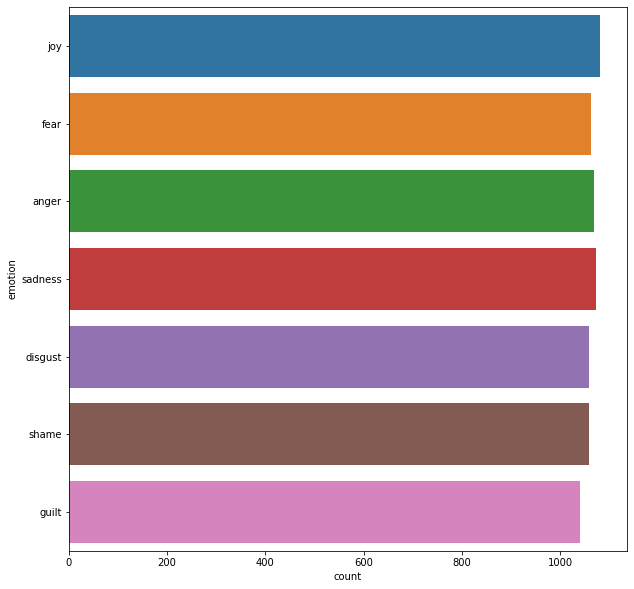

In [31]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y="emotion", data=df)

# Counter for most common 10 words

In [32]:
from collections import Counter
topten_words = Counter(" ".join(df["text"]).split()).most_common(10)

In [33]:
topten_words

[('friend', 896),
 ('felt', 877),
 ('one', 687),
 ("n't", 558),
 ('time', 535),
 ("'s", 465),
 ('got', 434),
 ('mother', 404),
 ('would', 397),
 ('told', 385)]

In [34]:
indexes = []
counts = []
for index in range(10):
  indexes.append(topten_words[index][0])
  counts.append(topten_words[index][1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts of particular words')

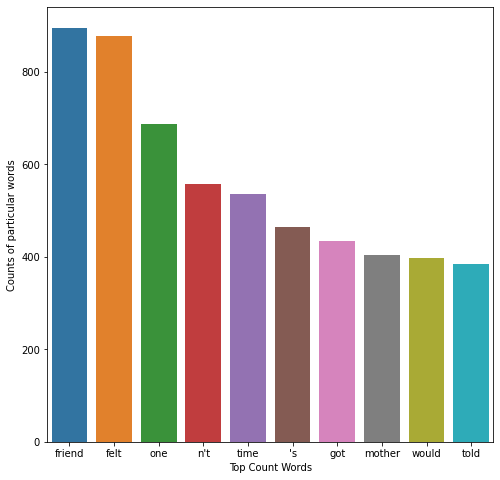

In [35]:
plt.figure(figsize=(8,8))
ax = sns.barplot(indexes, counts, data=df)
plt.xlabel("Top Count Words")
plt.ylabel("Counts of particular words")

# Maximum Frequency from each classes

In [36]:
def plot_class_words(indexes, counts, emotion_class):
  plt.figure(figsize=(8,8))
  ax = sns.barplot(indexes, counts, data=df)
  plt.xlabel(f"Top {emotion_class} Words")
  plt.ylabel("Counts of particular words")

def class_word_freq(emotion_class):
  temp_df = df[df["emotion"] == emotion_class]

  topten_classwords = Counter(" ".join(temp_df["text"]).split()).most_common(10)

  # print(topten_classwords)

  indexes = []
  counts = []
  for index in range(10):
    indexes.append(topten_classwords[index][0])
    counts.append(topten_classwords[index][1])

  plot_class_words(indexes, counts, emotion_class)



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

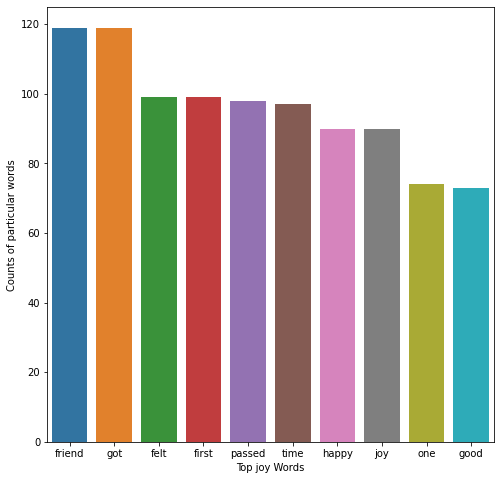

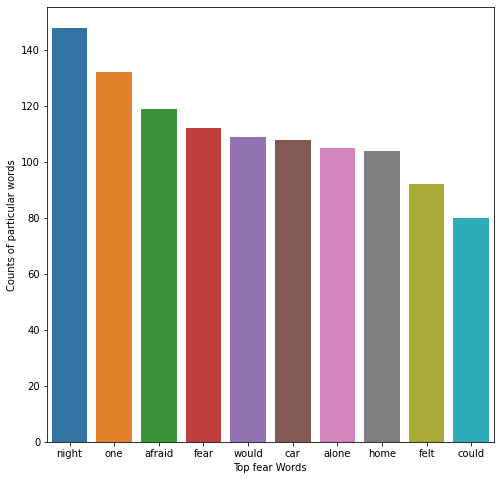

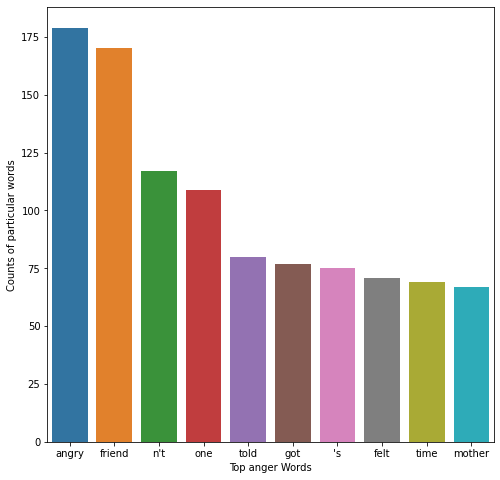

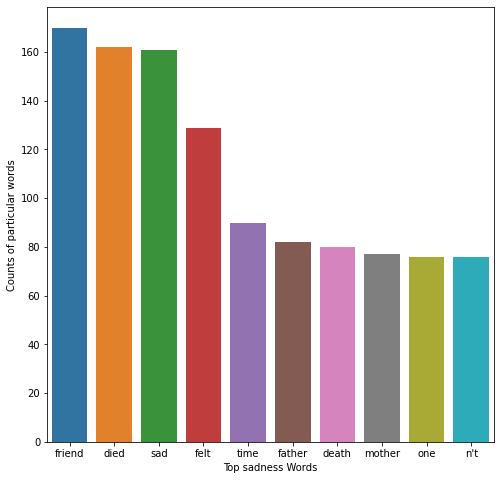

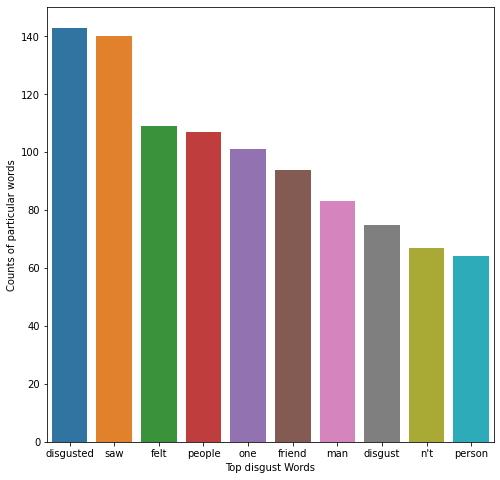

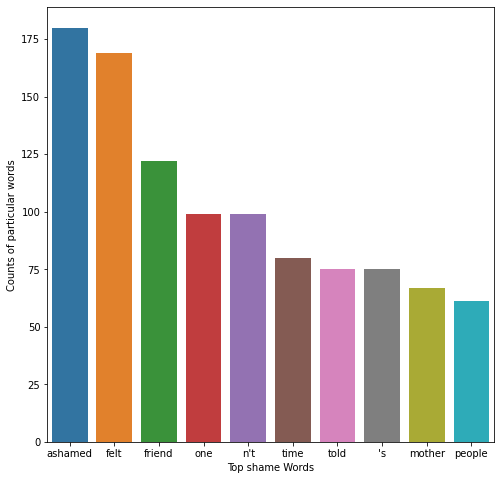

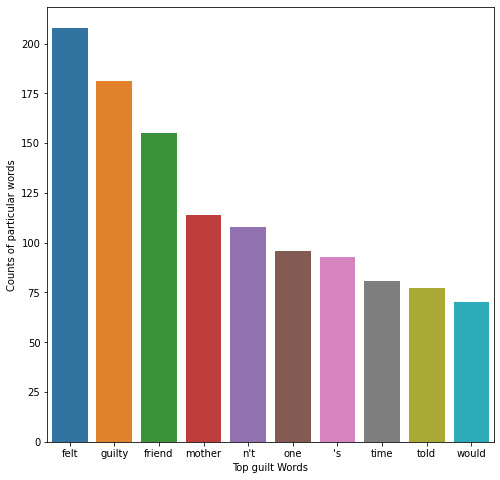

In [37]:
for emotion in df["emotion"].unique():
  class_word_freq(emotion)

# class_word_freq("joy")